In [1]:
import pickle, glob, os, blosc

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from time import sleep
from datetime import datetime, date, timedelta

from matplotlib import rc, cm

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex = True)

plt.rcParams['figure.facecolor'] = 'white'

path_to_data   = r"/Users/Guille/Desktop/caiso_power/data/CO2/"
path_to_images = r"/Users/Guille/Desktop/caiso_power/images/"

# CAISO GHG emissions

In [2]:
# 20220213 4328659 1529571 1053
# 20220216 4385325 1537733 1023
# 20220219 4689395 1681238 2033
# 20220311 4669008 1556100 1261
date_1 = "20220219"
date_2 = "20220311"

Energy_1_ = pd.read_csv(path_to_data + "CAISO-netdemand-{}.csv".format(date_1), on_bad_lines = 'skip').to_numpy()[:, :-1]
Energy_2_ = pd.read_csv(path_to_data + "CAISO-netdemand-{}.csv".format(date_2), on_bad_lines = 'skip').to_numpy()[:, :-1]
print(Energy_1_[:, 0])

ac_Net_1_  = Energy_1_[1, 1:] - Energy_1_[-2, 1:] - Energy_1_[-1, 1:]
ac_Net_2_  = Energy_2_[1, 1:] - Energy_2_[-2, 1:] - Energy_2_[-1, 1:]
fc_Net_1_  = Energy_1_[2, 1:]
fc_Net_2_  = Energy_2_[2, 1:]


RMSE_1 = np.sqrt(np.mean((ac_Net_1_ - fc_Net_1_)**2))
RMSE_2 = np.sqrt(np.mean((ac_Net_2_ - fc_Net_2_)**2))
MAPE_1 = 100.*np.mean(np.absolute(ac_Net_1_ - fc_Net_1_)/ac_Net_1_)
MAPE_2 = 100.*np.mean(np.absolute(ac_Net_2_ - fc_Net_2_)/ac_Net_2_)

Emissions_1_ = pd.read_csv(path_to_data + "CAISO-co2-{}.csv".format(date_1), on_bad_lines = 'skip')
Emissions_2_ = pd.read_csv(path_to_data + "CAISO-co2-{}.csv".format(date_2), on_bad_lines = 'skip')

labels_1_ = Emissions_1_.columns
labels_2_ = Emissions_2_.columns

Emissions_1_ = Emissions_1_.to_numpy()[0, 1:]
Emissions_2_ = Emissions_2_.to_numpy()[0, 1:]

['Hour-ahead forecast' 'Demand' 'Day-ahead net forecast' 'Solar' 'Wind']


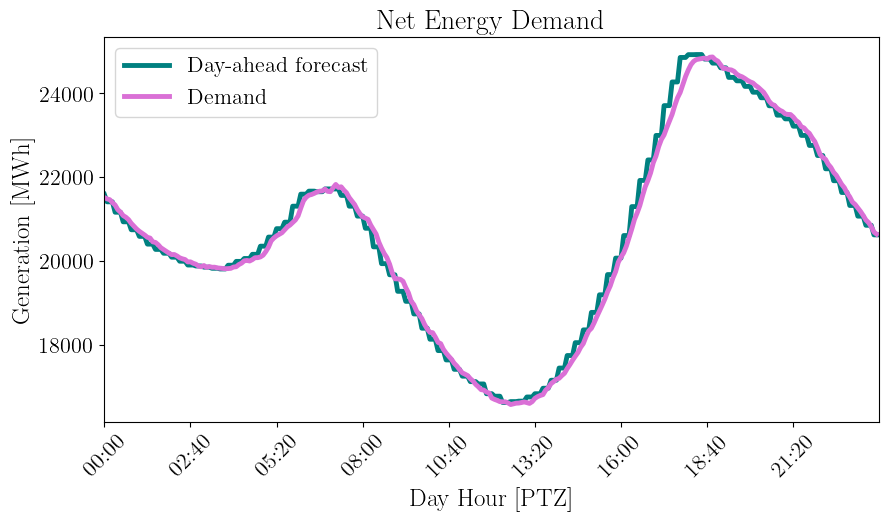

In [3]:
plt.figure(figsize = (10, 5))
plt.title('Net Energy Demand', fontsize = 20)
plt.plot(Energy_1_[0, 1:].T, linewidth = 3.5, color = 'teal', label = 'Day-ahead forecast')
plt.plot(Energy_1_[1, 1:].T, linewidth = 3.5, color = 'orchid', label = 'Demand')
plt.ylabel('Generation [MWh]', fontsize = 18)
plt.xlabel('Day Hour [PTZ]', fontsize = 18)
plt.xlim(0, 288)
plt.legend(fontsize = 16, loc = 'upper left')
plt.yticks(fontsize = 16)
plt.xticks(np.linspace(0, labels_1_[1:].shape[0] - 1, labels_1_[1:].shape[0])[::32], labels_1_[1:][::32], rotation = 45, fontsize = 16)
#plt.savefig(path_to_images + "CAISO-net.pdf", bbox_inches = 'tight', dpi = 100)
plt.show()

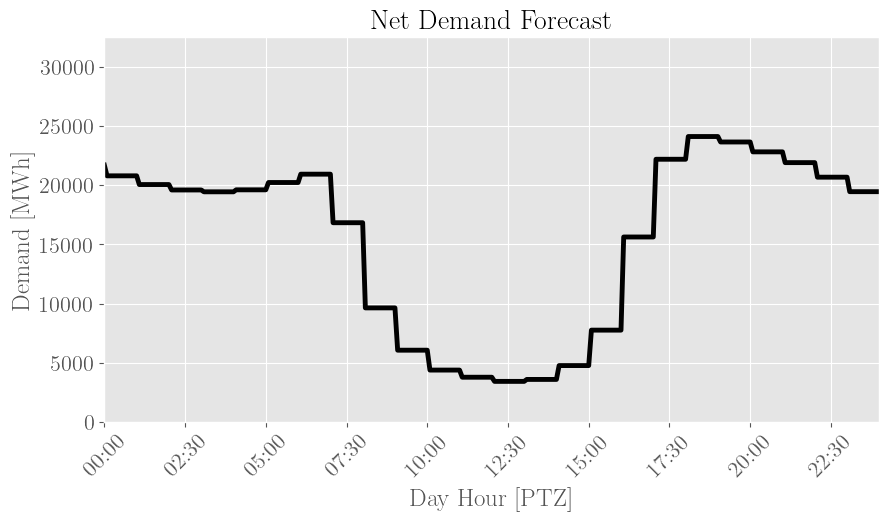

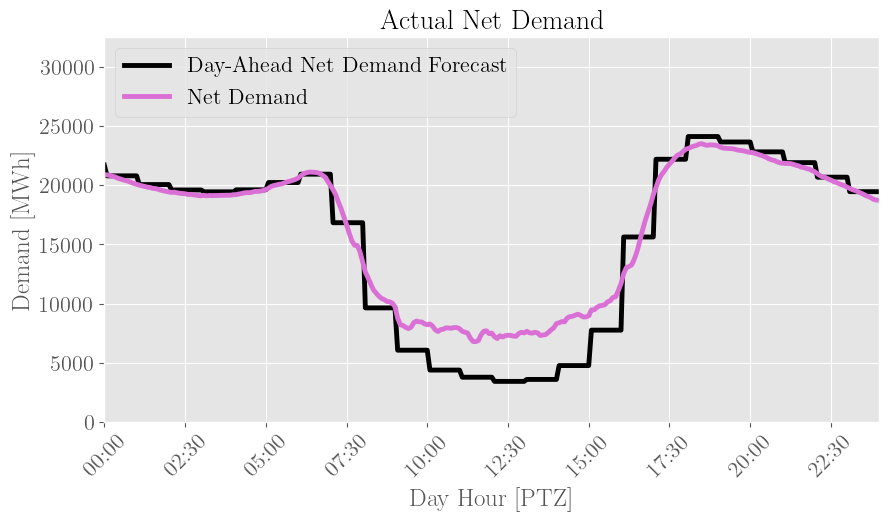

In [4]:
with plt.style.context('ggplot'):

    plt.figure(figsize = (10, 5))
    plt.title('Net Demand Forecast', fontsize = 20)
    plt.plot(Energy_1_[2, 1:].T, linewidth = 3.5, color = 'k', label = 'Day-Ahead Net Demand Forecast')
    plt.ylabel('Demand [MWh]', fontsize = 18)
    plt.xlabel('Day Hour [PTZ]', fontsize = 18)
    plt.xlim(0, 288)
    plt.ylim(0, 32500)
    #plt.legend(fontsize = 16, loc = 'upper left')
    plt.yticks(fontsize = 16)
    plt.xticks(np.linspace(0, labels_1_[1:].shape[0] - 1, labels_1_[1:].shape[0])[::30], labels_1_[1:][::30], rotation = 45, fontsize = 16)
    plt.savefig(path_to_images + "CAISO-net_demand-fc.pdf", bbox_inches = 'tight', dpi = 100)
    plt.show()

    plt.figure(figsize = (10, 5))
    plt.title('Actual Net Demand', fontsize = 20)
    plt.plot(Energy_1_[2, 1:].T, linewidth = 3.5, color = 'k', label = 'Day-Ahead Net Demand Forecast')
    plt.plot(Energy_1_[1, 1:].T - Energy_1_[-1, 1:].T - Energy_1_[-2, 1:].T, linewidth = 3.5, color = 'orchid', label = 'Net Demand')
    plt.ylabel('Demand [MWh]', fontsize = 18)
    plt.xlabel('Day Hour [PTZ]', fontsize = 18)
    plt.xlim(0, 288)
    plt.ylim(0, 32500)
    plt.legend(fontsize = 16, loc = 'upper left')
    plt.yticks(fontsize = 16)
    plt.xticks(np.linspace(0, labels_1_[1:].shape[0] - 1, labels_1_[1:].shape[0])[::30], labels_1_[1:][::30], rotation = 45, fontsize = 16)
    plt.savefig(path_to_images + "CAISO-net_demand-ac.pdf", bbox_inches = 'tight', dpi = 100)
    plt.show()

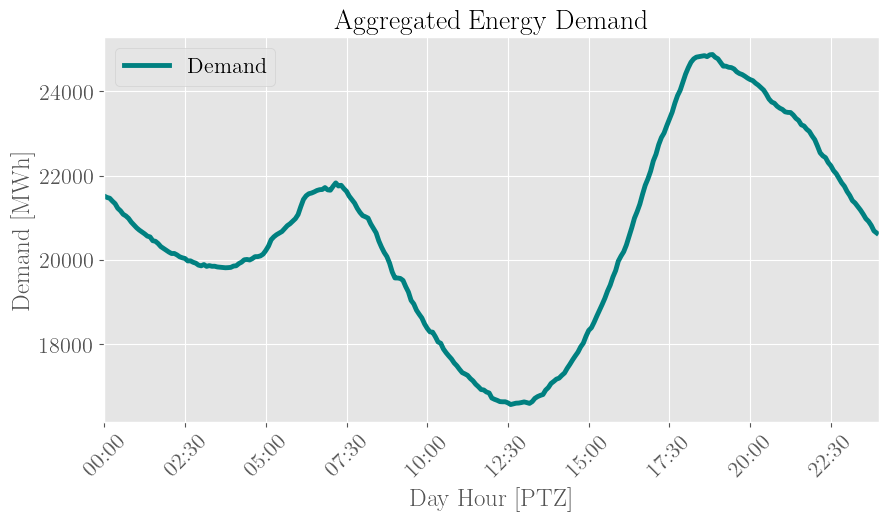

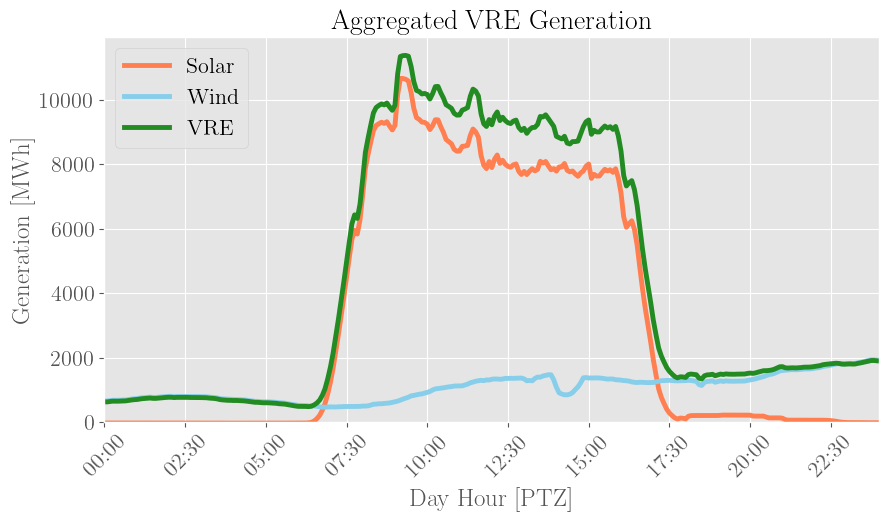

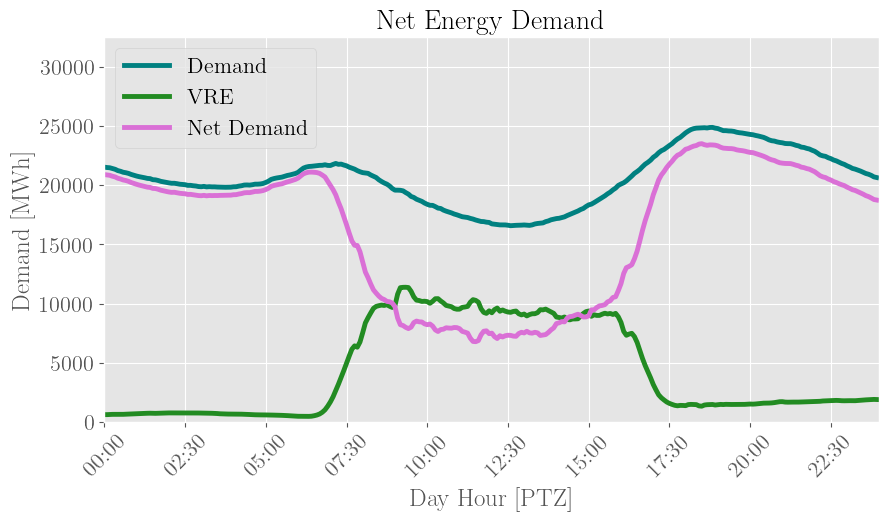

In [5]:
with plt.style.context('ggplot'):

    plt.figure(figsize = (10, 5))
    plt.title('Aggregated Energy Demand', fontsize = 20)
    #plt.plot(Energy_1_[0, 1:].T, linewidth = 3.5, color = 'gray', label = 'Hour-Ahead Demand Forecast')
    plt.plot(Energy_1_[1, 1:].T, linewidth = 3.5, color = 'teal', label = 'Demand')
    plt.ylabel('Demand [MWh]', fontsize = 18)
    plt.xlabel('Day Hour [PTZ]', fontsize = 18)
    plt.xlim(0, 288)
    #plt.ylim(0, 200)
    plt.legend(fontsize = 16, loc = 'upper left')
    plt.yticks(fontsize = 16)
    plt.xticks(np.linspace(0, labels_1_[1:].shape[0] - 1, labels_1_[1:].shape[0])[::30], labels_1_[1:][::30], rotation = 45, fontsize = 16)
    plt.savefig(path_to_images + "CAISO-demand.pdf", bbox_inches = 'tight', dpi = 100)
    plt.show()

    plt.figure(figsize = (10, 5))
    plt.title('Aggregated VRE Generation', fontsize = 20)
    plt.plot(Energy_1_[-2, 1:].T, linewidth = 3.5, color = 'coral', label = 'Solar')
    plt.plot(Energy_1_[-1, 1:].T, linewidth = 3.5, color = 'skyblue', label = 'Wind')
    plt.plot(Energy_1_[-1, 1:].T + Energy_1_[-2, 1:].T, linewidth = 3.5, color = 'forestgreen', label = 'VRE')
    plt.ylabel('Generation [MWh]', fontsize = 18)
    plt.xlabel('Day Hour [PTZ]', fontsize = 18)
    plt.xlim(0, 288)
    plt.ylim(0, )
    plt.yticks(fontsize = 16)
    plt.legend(fontsize = 16, loc = 'upper left')
    plt.xticks(np.linspace(0, labels_1_[1:].shape[0] - 1, labels_1_[1:].shape[0])[::30], labels_1_[1:][::30], rotation = 45, fontsize = 16)
    plt.savefig(path_to_images + "CAISO-VRE.pdf", bbox_inches = 'tight', dpi = 100)
    plt.show()

    plt.figure(figsize = (10, 5))
    plt.title('Net Energy Demand', fontsize = 20)
    #plt.plot(Energy_1_[2, 1:].T, linewidth = 3.5, color = 'gray', label = 'Day-Ahead Net Demand Forecast')
    plt.plot(Energy_1_[1, 1:].T, linewidth = 3.5, color = 'teal', label = 'Demand')
    plt.plot(Energy_1_[-1, 1:].T + Energy_1_[-2, 1:].T, linewidth = 3.5, color = 'forestgreen', label = 'VRE')
    plt.plot(Energy_1_[1, 1:].T - Energy_1_[-1, 1:].T - Energy_1_[-2, 1:].T, linewidth = 3.5, color = 'orchid', label = 'Net Demand')
    plt.ylabel('Demand [MWh]', fontsize = 18)
    plt.xlabel('Day Hour [PTZ]', fontsize = 18)
    plt.xlim(0, 288)
    plt.ylim(0, 32500)
    plt.legend(fontsize = 16, loc = 'upper left')
    plt.yticks(fontsize = 16)
    plt.xticks(np.linspace(0, labels_1_[1:].shape[0] - 1, labels_1_[1:].shape[0])[::30], labels_1_[1:][::30], rotation = 45, fontsize = 16)
    plt.savefig(path_to_images + "CAISO-net.pdf", bbox_inches = 'tight', dpi = 100)
    plt.show()